In [2]:
import numpy as np
import torch

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('spiffy')
from spiffyplots import MultiPanel


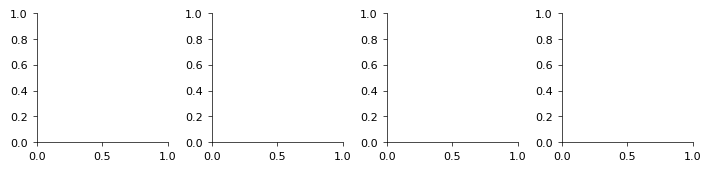

In [4]:
fig = MultiPanel(grid=[4], figsize=(7, 1.6))

In [82]:
import torch.nn.functional as F
import stork

kernel = torch.tensor(stork.utils.get_lif_kernel(tau_mem=20e-3, tau_syn=10e-3, dt=1e-3), dtype=torch.float32)

kernel = torch.cat([kernel.flip(0)[:-1], -kernel])

signal = torch.zeros(1, 500, 1)
signal[0, 100, 0] = 1

target = torch.zeros(1, 500, 1)
target[0, 300, 0] = 1

def time_conv1d(signal, kernel):
    # signal: [B, T_signal, N]
    # kernel: [T_kernel]

    # Flip the kernel for true convolution
    kernel = kernel.flip(0)

    # Transpose signal to match conv1d expected input format [B, N, T_signal]
    signal = signal.transpose(1, 2)
    
    # Reshape kernel for convolution: [1, 1, T_kernel]
    kernel = kernel.view(1, 1, -1)
    
    # Explicit padding to keep output the same size
    pad = kernel.shape[-1] - 1
    
    # Perform convolution along time dimension
    result = F.conv1d(signal, kernel, padding=pad)
    
    # Trim extra padding if needed
    result = result[:, :, :signal.shape[-1]]
    
    # Transpose result back to [B, T_signal, N]
    return result.transpose(1, 2)

pred_vR = time_conv1d(signal, kernel)
tar_vR = time_conv1d(target, kernel)


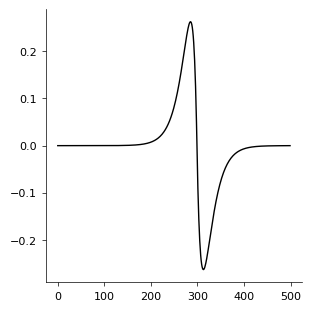

In [84]:
torch.nn.MSELoss()(pred_vR, tar_vR)

plt.plot(pred_vR[0, :,0].numpy(), color='black')
#plt.plot(tar_vR[0, :,0].numpy(), color='tomato')

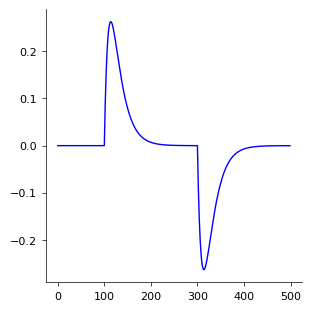

In [75]:
plt.plot(pred_vR[0, :,0].numpy() - tar_vR[0, :,0].numpy(), color='blue')